<a href="https://colab.research.google.com/github/jaiaakash5607/Weather-Prediction-2/blob/main/Weather_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/play_tennis_50.csv")
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,Overcast,Hot,Normal,T,yes
1,Rainy,Hot,Normal,T,no
2,Sunny,Cool,Normal,T,no
3,Overcast,Cool,High,F,yes
4,Sunny,Hot,High,T,no


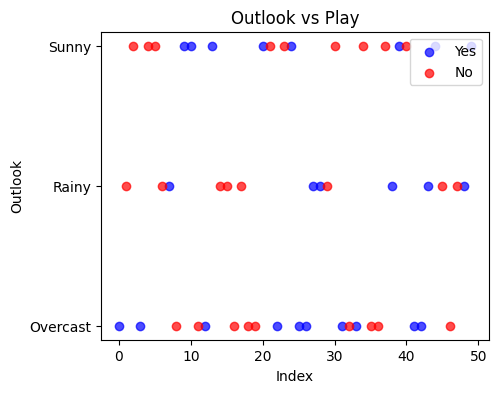

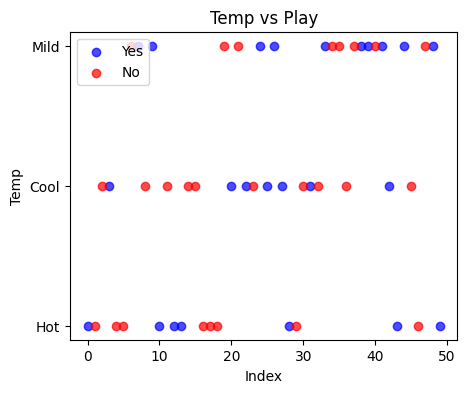

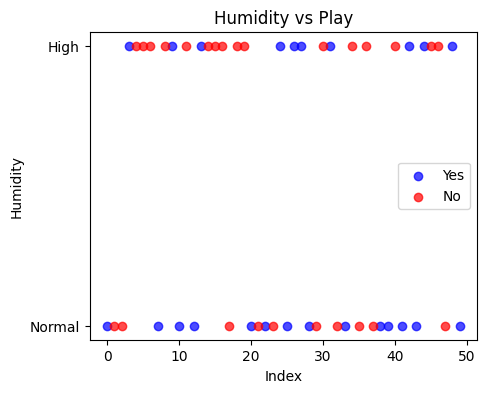

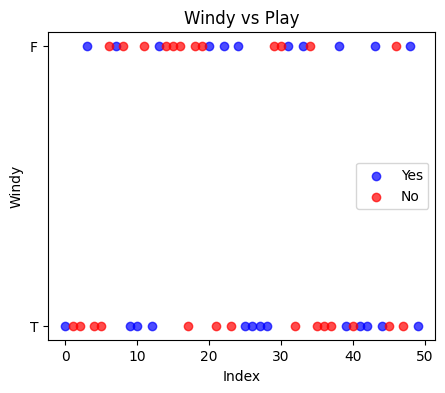

In [ ]:
for i in df.columns:
    if i != "Play":
        plt.figure(figsize=(5,4))
        plt.scatter(df[df["Play"]=="yes"][i].index, df[df["Play"]=="yes"][i],
                    color="blue", label="Yes", alpha=0.7)
        plt.scatter(df[df["Play"]=="no"][i].index, df[df["Play"]=="no"][i],
                    color="red", label="No", alpha=0.7)
        plt.title(f"{i} vs Play")
        plt.xlabel("Index")
        plt.ylabel(i)
        plt.legend()
        plt.show()


In [ ]:
numerics=LabelEncoder()

In [ ]:
df['Outlook_n']=numerics.fit_transform(df['Outlook'])
df['Temp_n']=numerics.fit_transform(df['Temp'])
df['Humidity_n']=numerics.fit_transform(df['Humidity'])
df['Windy_n']=numerics.fit_transform(df['Windy'])

df.head(10)

,Outlook,Temp,Humidity,Windy,Play,Outlook_n,Temp_n,Humidity_n,Windy_n
0,Overcast,Hot,Normal,T,yes,0,1,1,1
1,Rainy,Hot,Normal,T,no,1,1,1,1
2,Sunny,Cool,Normal,T,no,2,0,1,1
3,Overcast,Cool,High,F,yes,0,0,0,0
4,Sunny,Hot,High,T,no,2,1,0,1
5,Sunny,Hot,High,T,no,2,1,0,1
6,Rainy,Mild,High,F,no,1,2,0,0
7,Rainy,Mild,Normal,F,yes,1,2,1,0
8,Overcast,Cool,High,F,no,0,0,0,0
9,Sunny,Mild,High,T,yes,2,2,0,1


In [ ]:
df=df.drop(['Outlook','Temp','Humidity','Windy'],axis="columns")

df.head()

,Play,Outlook_n,Temp_n,Humidity_n,Windy_n
0,yes,0,1,1,1
1,no,1,1,1,1
2,no,2,0,1,1
3,yes,0,0,0,0
4,no,2,1,0,1


In [ ]:
x=df.drop("Play",axis=1)
y=df["Play"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

          no       0.50      0.20      0.29         5
         yes       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10



In [ ]:
Outlook = int(input("enter Outlook | 0.Overcast | 1.Rainy | 2.Sunny: "))
Temp    = int(input("enter Temp | 0.Cool | 1.HOT | 2.Mild: "))
Hum     = int(input("enter Humidity | 0.High | 1.Normal: "))
Wind    = int(input("enter Windy | 0.F | 1.T: "))

user_input = [[Outlook, Temp, Hum, Wind]]
prediction = knn.predict(user_input)

print("Prediction:", prediction)


enter Outlook | 0.Overcast | 1.Rainy | 2.Sunny: 1
enter Temp | 0.Cool | 1.HOT | 2.Mild: 1
enter Humidity | 0.High | 1.Normal: 1
enter Windy | 0.F | 1.T: 0
Prediction: ['yes']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
